In [ ]:
"""
• OVERVIEW

Project: Predicting Titanic Surviors
------------------------------------
Objective: Predict whether a passenger survived the Titanic disaster based on features like age,
gender, and class. 

• Dataset: Titanic Dataset
• Algorithm: Logistic Regression or Random Forest. 
• Evaluation:  Accuracy, Precision, Recall 
"""

# Step 1: Data Collection and Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Boston Housing dataset
try:
    data = pd.read_csv("./Titanic-Dataset.csv")
    df = pd.DataFrame(data)
except ImportError:
    print("Dataset is not found.\n'Titanic-Dataset.csv' file is misplaced or missing.")

    

In [3]:
# Showing DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Check data types and missing values
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Summary statistics
print(df.describe()) 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Analysis of Missing and Irrelevant Data

Columns with Missing Data:

Age: 714 non-null entries (177 missing). Use the median for imputation (reasonable for numerical data like age).

Cabin: Only 204 non-null entries (687 missing). Since most of the data is missing, drop this column.

Embarked: 889 non-null entries (2 missing). Use the mode for imputation (categorical data).

Irrelevant Columns:

PassengerId: Does not contribute to prediction; drop it.
Name: Unique identifiers with no predictive value; drop it.
Ticket: Similar to Name, irrelevant for prediction; drop it.

Data Encoding:

Sex: Convert to numerical values (male=0, female=1).
Embarked: Perform one-hot encoding to handle categorical values (S, C, Q).

In [ ]:
# Handle Missing Values

# Fill missing Age with median
df['Age'].fillna(df['Age'].median())

C:\Users\PREM\AppData\Local\Temp\ipykernel_25360\3242535498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [10]:
# Encode 'Sex' column (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [11]:
# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [12]:
# Check for remaining missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked_Q      0
Embarked_S      0
dtype: int64


In [13]:
# Final Dataset Preview
print("\nCleaned Dataset Preview:")
print(df.head())


Cleaned Dataset Preview:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500   NaN       False   
1         1       1    1  38.0      1      0  71.2833   C85       False   
2         1       3    1  26.0      0      0   7.9250   NaN       False   
3         1       1    1  35.0      1      0  53.1000  C123       False   
4         0       3    0  35.0      0      0   8.0500   NaN       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


# Step 2: Exploratory Data Analysis (EDA)

Objectives:

1. Understand the relationships between features.
2. Visualize patterns and distributions.
3. Identify correlations between features and the target variable (Survived).
4. Detect any outliers or anomalies.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# General Dataset Overview
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


C:\Users\PREM\AppData\Local\Temp\ipykernel_25360\786939838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


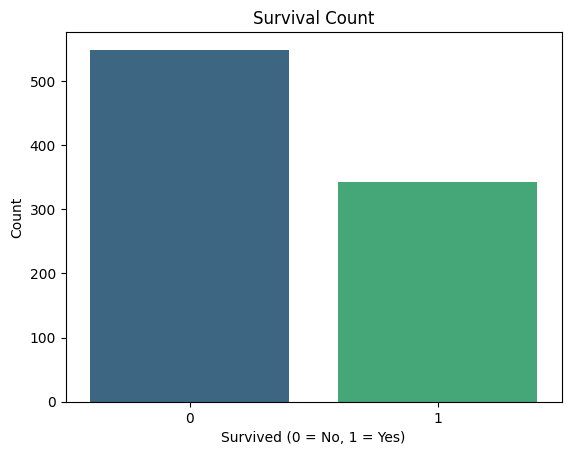

In [15]:
# Distribution of Survived (Target Variable)
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

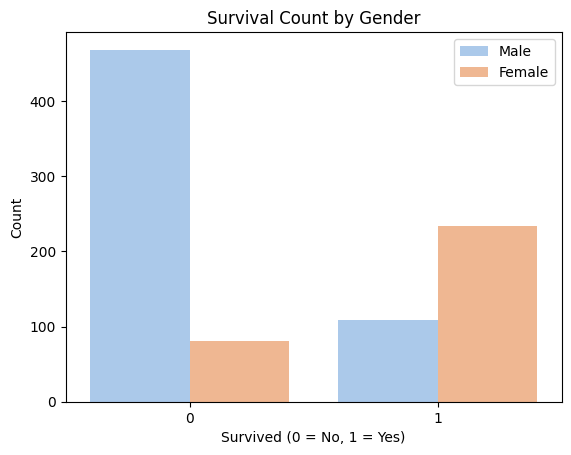

In [16]:
# Survival vs Sex
sns.countplot(x='Survived', hue='Sex', data=df, palette='pastel')
plt.title("Survival Count by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(['Male', 'Female'])
plt.show()

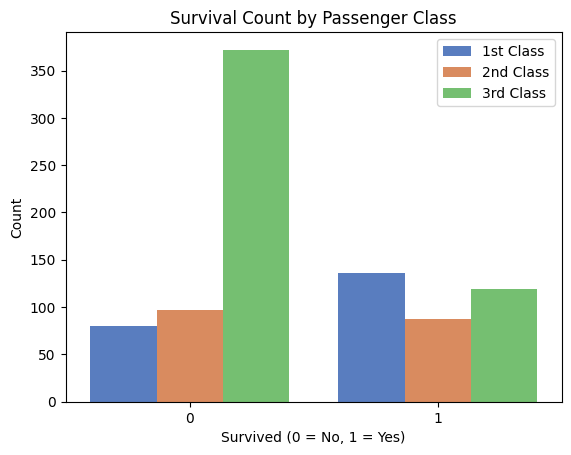

In [17]:
# Survival vs Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='muted')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

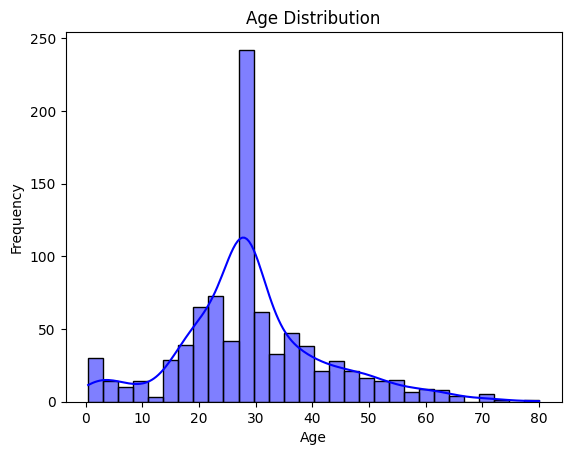

In [18]:
# Distribution of Age
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

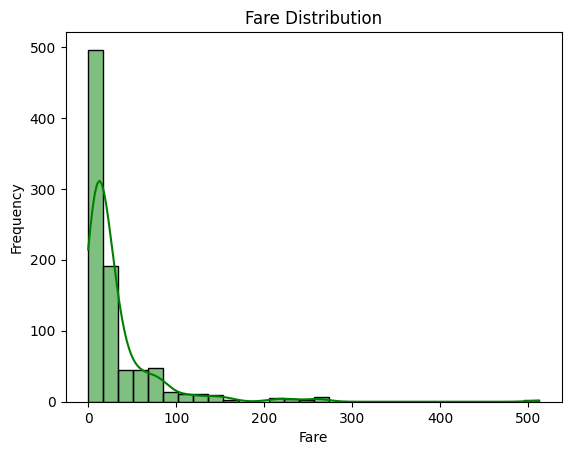

In [19]:
# Fare Distribution
sns.histplot(df['Fare'], kde=True, bins=30, color='green')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

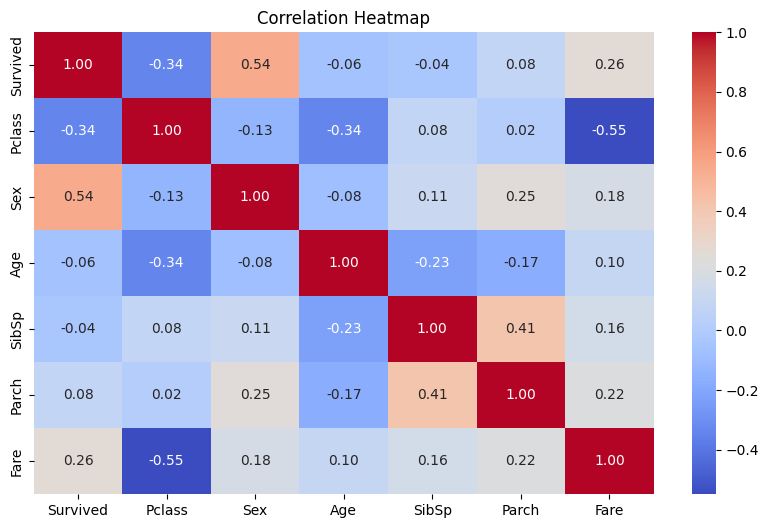

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

# Ensure only numeric columns are used for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

# Step 3: Feature Engineering & Data Preparation

1. Handle Categorical Variables: Convert categorical columns (Sex, Embarked) into numerical format using one-hot encoding or label encoding.

2. Drop Irrelevant Columns: Remove columns that don't contribute meaningfully to the prediction (e.g., Name, Ticket, PassengerId, Cabin).

3. Normalize/Standardize Numerical Features: Scale numerical columns (Age, Fare, etc.) to bring them to a similar 
range, especially if using algorithms sensitive to scaling (e.g., Logistic Regression).

4. Split Data: Split the dataset into training and testing sets.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop irrelevant columns
df = df.drop(['Cabin'], axis=1)
df.columns

In [30]:
# Separate features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [31]:
# Scale continuous features
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


# Step 4: Model Training

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [35]:
# Initialize models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [36]:
# Train Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [37]:
# Train Decision Tree
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [47]:
# Confusion Matrix Visualization
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Classification Report Visualization
def plot_classification_report(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
    plt.title(f"{model_name} - Classification Report")
    plt.xlabel("Metrics")
    plt.ylabel("Classes")
    plt.show()

Logistic Regression Results:
Accuracy: 0.8100558659217877


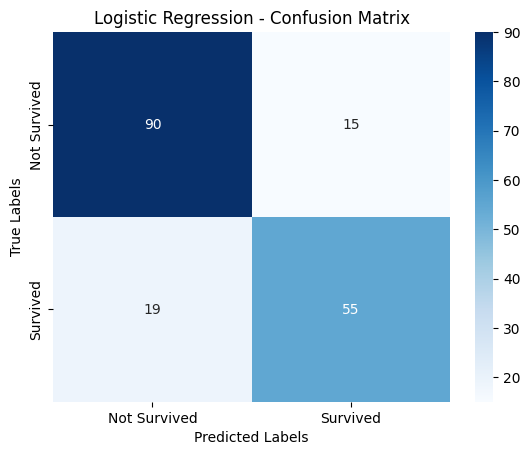

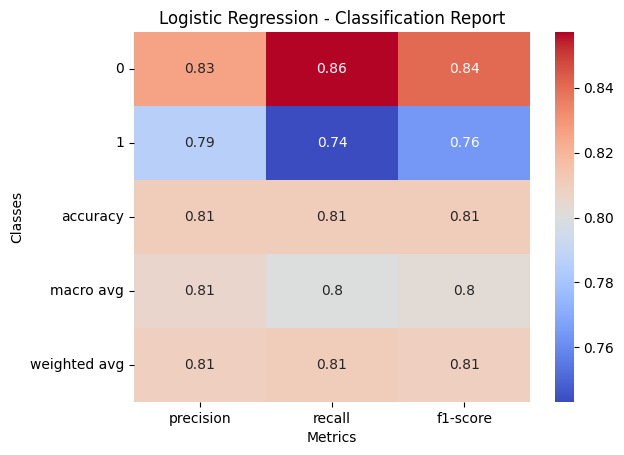

In [48]:
# Evaluate Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")
plot_classification_report(y_test, y_pred_logistic, "Logistic Regression")


Decision Tree Results:
Accuracy: 0.7877094972067039


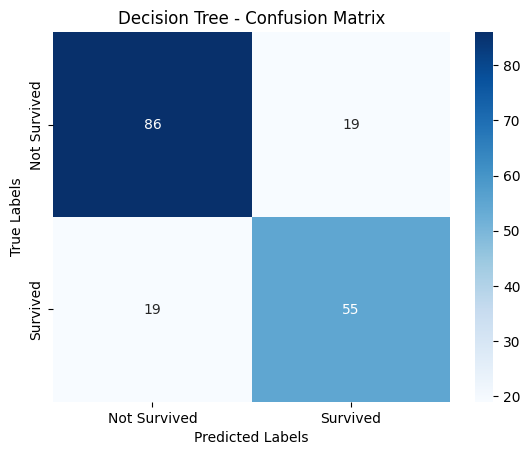

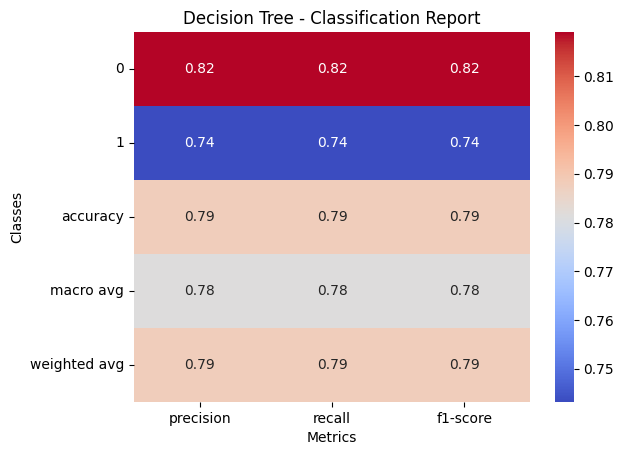

In [49]:
# Evaluate Decision Tree
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")
plot_classification_report(y_test, y_pred_tree, "Decision Tree")

In [50]:
# Compare and Save Best Model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [51]:
if logistic_accuracy > tree_accuracy:
    print("\nLogistic Regression is the better model. Saving it...")
    try:
        joblib.dump(logistic_model, "best_model.pkl")
        print('Model saved.')
    except:
        print("Unexpected error occuring while saving the model.")
else:
    print("\nDecision Tree is the better model. Saving it...")
    try:
        joblib.dump(decision_tree_model, "best_model.pkl")
        print('Model saved.')
    except:
        print("Unexpected error occuring while saving the model.")


Logistic Regression is the better model. Saving it...
Model saved.


# Step 5: Testing the Model

In [52]:
import pandas as pd
import joblib

# Load the best saved model
best_model = joblib.load('best_model.pkl')

In [53]:
# Sample data for testing (make sure it matches the cleaned and preprocessed format)
sample_data = pd.DataFrame({
    'Pclass': [3],    # Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
    'Sex': [0],       # Gender (0 = Male, 1 = Female)
    'Age': [25.0],    # Age of the passenger
    'SibSp': [0],     # No. of siblings/spouses aboard
    'Parch': [0],     # No. of parents/children aboard
    'Fare': [7.25],   # Ticket fare
    'Embarked_Q': [0], # Embarked at Q (0 = No, 1 = Yes)
    'Embarked_S': [1]  # Embarked at S (0 = No, 1 = Yes)
})

In [54]:
# Make a prediction
prediction = best_model.predict(sample_data)

# Output the result
if prediction[0] == 1:
    print("Prediction: Survived")
else:
    print("Prediction: Did Not Survive")

Prediction: Did Not Survive
